In [4]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


In [6]:
# To set the Row, Column and Width of the Dataframe to show on Hupyter Notebook
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)


# <font color = blue> EDA Case Study </font>

We have two different dataset which having all the informations of the client at the time of application that whether a client has payment difficulties or not and another dataset is related to the previous loan data which contains the data whether the previous application had been approval, cancelled, refused or unused offer.  
In this assignment, we will try to find some interesting insights if a client has difficulty paying their installments which may be used for taking action related to loan, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Application Data.

Read the EDA Application data file provided and store it in a dataframe `EDA_App`.
It is about whether a client has payment difficulties.

Read the EDA Previous Application data file provided and store it in a dataframe `EDA_Prev_App`.
It contains the data whether the previous application had been approved, cancelled, refused or unused offer.


In [7]:
# Read the csv file using 'read_csv'.
EDA_App = pd.read_csv("F:/UpGrade/M_13_Case Study/Credit EDA Case Study-20210323T115611Z-001/Credit EDA Case Study/application_data.csv")

In [8]:
EDA_App.head() #Showing all the EDA Application data with headers

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [9]:
# Check the number of rows and columns in the dataframe
EDA_App.shape

(307511, 122)

In [10]:
# Check the column-wise info of one dataframe Application
EDA_App.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [11]:
# To check Null values of columns
EDA_App_Null = EDA_App.isnull().sum()
EDA_App_Null

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [12]:
# To reprsent the % or ratio of data imbalance in a dataframe 'Application_data'. 
EDA_App_Null_Per = round(100*(EDA_App.isnull().sum()/len(EDA_App.index)),3)
EDA_App_Null_Per

SK_ID_CURR                       0.000
TARGET                           0.000
NAME_CONTRACT_TYPE               0.000
CODE_GENDER                      0.000
FLAG_OWN_CAR                     0.000
FLAG_OWN_REALTY                  0.000
CNT_CHILDREN                     0.000
AMT_INCOME_TOTAL                 0.000
AMT_CREDIT                       0.000
AMT_ANNUITY                      0.004
AMT_GOODS_PRICE                  0.090
NAME_TYPE_SUITE                  0.420
NAME_INCOME_TYPE                 0.000
NAME_EDUCATION_TYPE              0.000
NAME_FAMILY_STATUS               0.000
NAME_HOUSING_TYPE                0.000
REGION_POPULATION_RELATIVE       0.000
DAYS_BIRTH                       0.000
DAYS_EMPLOYED                    0.000
DAYS_REGISTRATION                0.000
DAYS_ID_PUBLISH                  0.000
OWN_CAR_AGE                     65.991
FLAG_MOBIL                       0.000
FLAG_EMP_PHONE                   0.000
FLAG_WORK_PHONE                  0.000
FLAG_CONT_MOBILE         

In [13]:
# To check number of columns which has Null values greater than 30%
len(EDA_App_Null_Per[EDA_App_Null_Per.values>=(0.3)])

62

In [14]:
# List all the columns which values is greater than and equal t0 30%
EDA_Null_Per_30 = list(EDA_App_Null_Per[EDA_App_Null_Per.values>=0.3].index)
EDA_Null_Per_30

['NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',


In [15]:
# Drop all the values which values is greater than equal to 30%.
EDA_App_Not_Null = EDA_App.drop(labels = EDA_Null_Per_30, axis=1, inplace=True)

In [16]:
# To check rows and columns of a dataframe
EDA_App.shape

(307511, 60)

In [17]:
# Recheck the Null values of a dataframe with the remaining columns
EDA_App.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
CNT_FAM_MEMBERS                  2
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT

In [857]:
# Get information of columns of the dataframe
EDA_App.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [18]:
# To check % of variations of the updated dataframe columns
round(100*(EDA_App.isnull().sum()/len(EDA_App.index)),4)

SK_ID_CURR                     0.0000
TARGET                         0.0000
NAME_CONTRACT_TYPE             0.0000
CODE_GENDER                    0.0000
FLAG_OWN_CAR                   0.0000
FLAG_OWN_REALTY                0.0000
CNT_CHILDREN                   0.0000
AMT_INCOME_TOTAL               0.0000
AMT_CREDIT                     0.0000
AMT_ANNUITY                    0.0039
AMT_GOODS_PRICE                0.0904
NAME_INCOME_TYPE               0.0000
NAME_EDUCATION_TYPE            0.0000
NAME_FAMILY_STATUS             0.0000
NAME_HOUSING_TYPE              0.0000
REGION_POPULATION_RELATIVE     0.0000
DAYS_BIRTH                     0.0000
DAYS_EMPLOYED                  0.0000
DAYS_REGISTRATION              0.0000
DAYS_ID_PUBLISH                0.0000
FLAG_MOBIL                     0.0000
FLAG_EMP_PHONE                 0.0000
FLAG_WORK_PHONE                0.0000
FLAG_CONT_MOBILE               0.0000
FLAG_PHONE                     0.0000
FLAG_EMAIL                     0.0000
CNT_FAM_MEMB

In [19]:
# To check null values of a column
EDA_App.AMT_ANNUITY.isnull().sum()

12

In [20]:
# To check null values of a column
EDA_App.AMT_GOODS_PRICE.isnull().sum()

278

In [21]:
# To check null values of a column
EDA_App.CNT_FAM_MEMBERS.isnull().sum()

2

In [22]:
# To check null values of a column
EDA_App.EXT_SOURCE_2.isnull().sum()

660

In [23]:
# To check null values of a column
EDA_App.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [24]:
# To check the details of the Null column with all the rows
EDA_App[EDA_App['AMT_ANNUITY'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.026392,-10668,-2523,-4946.0,-3238,1,1,1,1,1,0,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.626896,-2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Working,Lower secondary,Civil marriage,House / apartment,0.035792,-9027,-1270,-3640.0,-741,1,1,1,1,0,0,2.0,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1,0.727274,-706.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Working,Secondary / secondary special,Married,House / apartment,0.046220,-17376,-3950,-11524.0,-831,1,1,0,1,0,0,2.0,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,0.738370,-199.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,State servant,Higher education,Married,House / apartment,0.035792,-11329,-2040,-3195.0,-3069,1,1,0,1,0,0,2.0,2,2,FRIDAY,13,0,0,0,1,1,1,Government,0.566316,-2841.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.046220,-19762,-2498,-11285.0,-3305,1,1,1,1,1,0,1.0,1,1,FRIDAY,15,0,1,1,0,1,1,Other,0.583947,-743.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Working,Higher education,Single / not married,Rented apartment,0.022800,-20831,-2450,-771.0,-4203,1,1,0,1,0,0,1.0,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.667564,-1986.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,State servant,Secondary / secondary special,Married,House / apartment,0.015221,-12134,-3721,-858.0,-591,1,1,0,1,1,0,2.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Medicine,0.154811,-348.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.019689,-13902,-3540,-168.0,-4250,1,1,0,1,0,1,2.0,2,2,SATURDAY,12,0,0,0,0,0,0,Self-employed,0.510934,-1331.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,486000.0,Commercial associate,Higher education,Married,House / apartment,0.018634,-10151,-472,-10127.0,-2787,1,1,0,1,1,0,2.0,2,2,WEDNESDAY,13,1,1,1,1,1,1,Security,0.706306,-295.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,499500.0,Commercial associate,Higher education,Married,Municipal apartment,0.046220,-16344,-1478,-482.0,-4192,1,1,0,1,0,0,2.0,1,1,WEDNESDAY,11,0,1,1,0,0,0,Business Entity Type 3,0.618698,-1255.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# To count the values in a column
EDA_App['AMT_ANNUITY'].value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [26]:
# To describe the column
round(EDA_App.AMT_ANNUITY.describe(),2)

count    307499.00
mean      27108.57
std       14493.74
min        1615.50
25%       16524.00
50%       24903.00
75%       34596.00
max      258025.50
Name: AMT_ANNUITY, dtype: float64

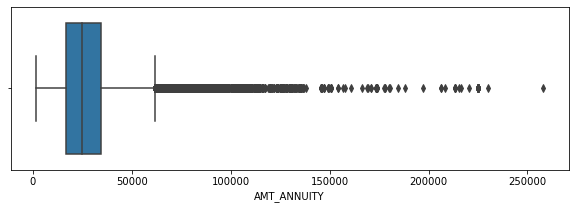

In [27]:
# To find outliers for the column 'AMT_ANNUITY'
plt.figure(figsize = [10,3])
sns.boxplot(EDA_App["AMT_ANNUITY"])
plt.show()

In [28]:
# Find out the quantile (0.25, 0.5, 0.7, 0.75, 0.8, 0.9, 0.95, 0.99, 1) of 'AMT_ANNUITY' column
EDA_App["AMT_ANNUITY"].quantile([0.25, 0.5, 0.7, 0.75, 0.8, 0.9, 0.95, 0.99, 1])

0.25     16524.0
0.50     24903.0
0.70     32004.0
0.75     34596.0
0.80     37516.5
0.90     45954.0
0.95     53325.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

#### The above result is showing that 'AMT_ANNUITY' column has outliers and the maximum outliers lies between 0.99 and 1 quantile. Therefore we should impute the value of NaN values by taking median of this column.

In [29]:
# To find Median of 'AMT_ANNUITY' Column
AMT_median = round(EDA_App['AMT_ANNUITY'].median(), 2)
AMT_median

24903.0

In [30]:
# To replace null value of 'AMT_ANNUITY' with median
EDA_App['AMT_ANNUITY'] = EDA_App['AMT_ANNUITY'].fillna(AMT_median)

In [31]:
# To recheck Null values for 'AMT_ANNUITY'column
EDA_App.AMT_ANNUITY.isnull().sum() 

0

In [32]:
# CNT_FAM_MEMBERS column has very minimum nul values, therefore those rows can be removed
EDA_App = EDA_App[~EDA_App.CNT_FAM_MEMBERS.isnull()]

In [33]:
# To recheck Null values for 'CNT_FAM_MEMBERS'column
EDA_App.CNT_FAM_MEMBERS.isnull().sum()

0

In [34]:
# DAYS_LAST_PHONE_CHANGE column has very minimum nul values, therefore those rows can be removed
EDA_App = EDA_App[~EDA_App.DAYS_LAST_PHONE_CHANGE.isnull()]

In [35]:
# To recheck Null values for 'DAYS_LAST_PHONE_CHANGE'column
EDA_App.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

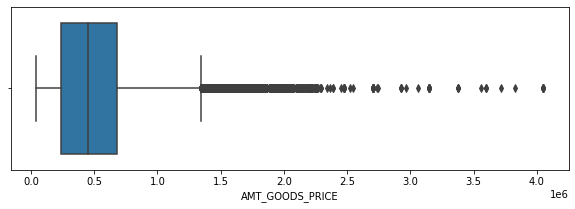

In [36]:
# To find outliers for the column 'AMT_GOOD_PRICE'
plt.figure(figsize = [10,3])
sns.boxplot(EDA_App["AMT_GOODS_PRICE"])
plt.show()

In [37]:
# Find out the quantile (0.5, 0.7,00.9, 0.95, 0.99, 1) of 'AMT_ANNUITY' column
EDA_App["AMT_GOODS_PRICE"].quantile([0.25, 0.5, 0.7, 0.75, 0.8, 0.9, 0.95, 0.99, 1])

0.25     238500.0
0.50     450000.0
0.70     675000.0
0.75     679500.0
0.80     814500.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [38]:
# To find mean of 'AMT_GOODS_PRICE' 
Goods_mean = round(EDA_App['AMT_GOODS_PRICE'].mean(), 2)
Goods_mean

538397.14

In [39]:
# Repalce null values from mean value 
EDA_App['AMT_GOODS_PRICE'] = EDA_App['AMT_GOODS_PRICE'].fillna(Goods_mean)

In [40]:
# To recheck Null values for 'AMT_GOODS_PRICE'column
EDA_App.AMT_GOODS_PRICE.isnull().sum()

0

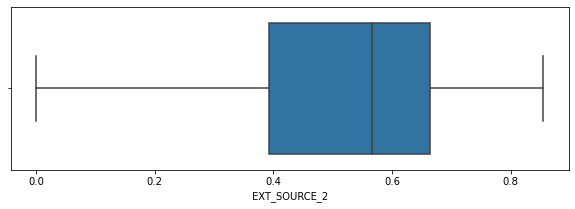

In [41]:
# To find outliers for the column 'EXT_SOURCE_2'
plt.figure(figsize = [10,3])
sns.boxplot(EDA_App["EXT_SOURCE_2"])
plt.show()

In [42]:
# Find out the quantile (0.5, 0.7,00.9, 0.95, 0.99, 1) of 'EXT_SOURCE_2' column
EDA_App["EXT_SOURCE_2"].quantile([0.25, 0.5, 0.7, 0.75, 0.8, 0.9, 0.95, 0.99, 1])

0.25    0.392457
0.50    0.565961
0.70    0.645869
0.75    0.663617
0.80    0.682064
0.90    0.722048
0.95    0.747735
0.99    0.782793
1.00    0.855000
Name: EXT_SOURCE_2, dtype: float64

In [43]:
# Find out mean for "EXT_SOURCE_2"
Ext_mean = round(EDA_App['EXT_SOURCE_2'].mean(), 2)
Ext_mean

0.51

In [44]:
# Repalce null values from mean value 
EDA_App['EXT_SOURCE_2'] = EDA_App['EXT_SOURCE_2'].fillna(Ext_mean)

In [45]:
# To recheck Null values for 'EXT_SOURCE_2'column
EDA_App.EXT_SOURCE_2.isnull().sum()

0

In [46]:
# Recheck the dataframe if still there is any null values
EDA_App.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_

In [47]:
EDA_App.shape

(307508, 60)

In [48]:
# To check the information of the updated dataframe columns
EDA_App.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307508 entries, 0 to 307510
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307508 non-null  int64  
 1   TARGET                       307508 non-null  int64  
 2   NAME_CONTRACT_TYPE           307508 non-null  object 
 3   CODE_GENDER                  307508 non-null  object 
 4   FLAG_OWN_CAR                 307508 non-null  object 
 5   FLAG_OWN_REALTY              307508 non-null  object 
 6   CNT_CHILDREN                 307508 non-null  int64  
 7   AMT_INCOME_TOTAL             307508 non-null  float64
 8   AMT_CREDIT                   307508 non-null  float64
 9   AMT_ANNUITY                  307508 non-null  float64
 10  AMT_GOODS_PRICE              307508 non-null  float64
 11  NAME_INCOME_TYPE             307508 non-null  object 
 12  NAME_EDUCATION_TYPE          307508 non-null  object 
 13 

In [52]:
# Get selected useful columns of 'Application_data' in a new dataframe for analysis
EDA_App_list = EDA_App.loc[:,["SK_ID_CURR", "TARGET", "NAME_CONTRACT_TYPE","CODE_GENDER", "CNT_CHILDREN", "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY", "NAME_INCOME_TYPE","NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE","DAYS_BIRTH","DAYS_EMPLOYED","CNT_FAM_MEMBERS","ORGANIZATION_TYPE"]]

In [53]:
EDA_App_list.head() # To show various columns of the New Dataframe

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,-16765,-1188,2.0,School
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1.0,Government
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,1.0,Religion


In [54]:
# To check the shape of the new dataframe
EDA_App_list.shape   

(307508, 16)

In [55]:
# To get column-wise information of the new dataframe
EDA_App_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307508 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307508 non-null  int64  
 1   TARGET               307508 non-null  int64  
 2   NAME_CONTRACT_TYPE   307508 non-null  object 
 3   CODE_GENDER          307508 non-null  object 
 4   CNT_CHILDREN         307508 non-null  int64  
 5   AMT_INCOME_TOTAL     307508 non-null  float64
 6   AMT_CREDIT           307508 non-null  float64
 7   AMT_ANNUITY          307508 non-null  float64
 8   NAME_INCOME_TYPE     307508 non-null  object 
 9   NAME_EDUCATION_TYPE  307508 non-null  object 
 10  NAME_FAMILY_STATUS   307508 non-null  object 
 11  NAME_HOUSING_TYPE    307508 non-null  object 
 12  DAYS_BIRTH           307508 non-null  int64  
 13  DAYS_EMPLOYED        307508 non-null  int64  
 14  CNT_FAM_MEMBERS      307508 non-null  float64
 15  ORGANIZATION_TYPE

In [56]:
# To check Null values in new dataframe's column
EDA_App_list.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
CNT_FAM_MEMBERS        0
ORGANIZATION_TYPE      0
dtype: int64

In [57]:
# For column wise description of new dataframe
round(EDA_App_list.describe(), 2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
count,307508.00,307508.00,307508.00,3.075080e+05,307508.00,307508.00,307508.00,307508.00,307508.00
mean,278181.33,0.08,0.42,1.687970e+05,599026.84,27108.46,-16037.04,63815.67,2.15
std,102789.98,0.27,0.72,2.371237e+05,402492.30,14493.53,4363.98,141276.31,0.91
min,100002.00,0.00,0.00,2.565000e+04,45000.00,1615.50,-25229.00,-17912.00,1.00
25%,189146.75,0.00,0.00,1.125000e+05,270000.00,16524.00,-19682.00,-2760.00,2.00
50%,278202.50,0.00,0.00,1.471500e+05,513531.00,24903.00,-15750.00,-1214.00,2.00
75%,367143.25,0.00,1.00,2.025000e+05,808650.00,34596.00,-12413.00,-289.00,3.00
max,456255.00,1.00,19.00,1.170000e+08,4050000.00,258025.50,-7489.00,365243.00,20.00


In [58]:
# To count and check values in a column
EDA_App_list['NAME_CONTRACT_TYPE'].value_counts(normalize=True)

Cash loans         0.904793
Revolving loans    0.095207
Name: NAME_CONTRACT_TYPE, dtype: float64

In [59]:
# To count and check values in a column
EDA_App_list['CODE_GENDER'].value_counts(normalize=True)

F      0.658347
M      0.341640
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [60]:
# To find the most occuring object in the column Gender Column
Code_mode = EDA_App_list['CODE_GENDER'].mode()[0]   # To get string value
Code_mode

'F'

In [61]:
# Replace old values ('XNA') with maximumm occuring value ('F') of the respective column
EDA_App_list['CODE_GENDER'] = EDA_App_list['CODE_GENDER'].replace(['XNA'],'F')

In [62]:
# To recount and check values in a column
EDA_App_list['CODE_GENDER'].value_counts(normalize=True)

F    0.65836
M    0.34164
Name: CODE_GENDER, dtype: float64

In [63]:
# To analyze 'ORGANIZATION_TYPE' column values
EDA_App_list['ORGANIZATION_TYPE'].value_counts(normalize=True)

Business Entity Type 3    0.221106
XNA                       0.180073
Self-employed             0.124914
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034315
Government                0.033833
School                    0.028920
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019460
Transport: type 4         0.017554
Trade: type 3             0.011353
Industry: type 9          0.010953
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

##### As 'XNA' in the 'ORGANIZATION_TYPE' column is up tp 18% therefore we can replace 'XNA' with the Maximum occuring value in the Organization Types 

In [64]:
# Find out mode for "ORGANIZATION_TYPE"
Org_mode = EDA_App['ORGANIZATION_TYPE'].mode()[0]
Org_mode

'Business Entity Type 3'

In [65]:
# Replace old values ('XNA') with maximumm occuring value ('Business Entity Type 3') of the respective column 
EDA_App_list['ORGANIZATION_TYPE'] = EDA_App_list['ORGANIZATION_TYPE'].replace(['XNA'],'Business Entity Type 3')

In [66]:
# To recount and check values in a column
EDA_App_list['ORGANIZATION_TYPE'].value_counts(normalize=True)

Business Entity Type 3    0.401180
Self-employed             0.124914
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034315
Government                0.033833
School                    0.028920
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019460
Transport: type 4         0.017554
Trade: type 3             0.011353
Industry: type 9          0.010953
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services                  0.005122
University          

In [67]:
# To analyze 'NAME_INCOME_TYPE' column
EDA_App_list['NAME_INCOME_TYPE'].value_counts(normalize=True)

Working                 0.516322
Commercial associate    0.232888
Pensioner               0.180034
State servant           0.070577
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

In [68]:
# To analyze 'NAME_EDUCATION_TYPE' column
EDA_App_list['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

Secondary / secondary special    0.710196
Higher education                 0.243447
Incomplete higher                0.033417
Lower secondary                  0.012406
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

In [69]:
# To replace 'Secondary / secondary special with Secondary.
EDA_App_list.NAME_EDUCATION_TYPE = EDA_App_list.NAME_EDUCATION_TYPE.replace(['Secondary / secondary special'], "Secondary")

In [70]:
# To analyze 'NAME_FAMILY_STATUS' column
EDA_App_list['NAME_FAMILY_STATUS'].value_counts(normalize=True)

Married                 0.638783
Single / not married    0.147782
Civil marriage          0.096827
Separated               0.064291
Widow                   0.052317
Name: NAME_FAMILY_STATUS, dtype: float64

In [71]:
# To replace 'Civil marriage', 'Seperated' as 'Married' and 'Single', 'Widow' as 'Not Married' just to make 2 categories.
EDA_App_list.NAME_FAMILY_STATUS = EDA_App_list.NAME_FAMILY_STATUS.replace(['Civil marriage','Separated'], "Married")
EDA_App_list.NAME_FAMILY_STATUS = EDA_App_list.NAME_FAMILY_STATUS.replace(['Single / not married','Widow'], "Not Married")

In [72]:
# To analyze 'NAME_FAMILY_STATUS' column
EDA_App_list['NAME_FAMILY_STATUS'].value_counts(normalize=True)

Married        0.799901
Not Married    0.200099
Name: NAME_FAMILY_STATUS, dtype: float64

In [73]:
# To analyze 'NAME_HOUSING_TYPE' column
EDA_App_list['NAME_HOUSING_TYPE'].value_counts(normalize=True)

House / apartment      0.887346
With parents           0.048259
Municipal apartment    0.036363
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64

In [74]:
# To make absolute value for 'DAYS_BIRTH' AND 'DAYS_EMPLOYED' column
EDA_App_list['DAYS_BIRTH'] = EDA_App_list['DAYS_BIRTH'].abs()
EDA_App_list['DAYS_EMPLOYED'] = EDA_App_list['DAYS_EMPLOYED'].abs()

In [75]:
# To convert 'CNT_FAM_MEMBERS' column data type from float to int as number of members can't be float
EDA_App_list.CNT_FAM_MEMBERS = EDA_App_list.CNT_FAM_MEMBERS.astype("int64")

In [76]:
# To recheck the detail of columns
EDA_App_list.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,Working,Secondary,Not Married,House / apartment,9461,637,1,Business Entity Type 3
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,16765,1188,2,School
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,Working,Secondary,Not Married,House / apartment,19046,225,1,Government
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,Working,Secondary,Married,House / apartment,19005,3039,2,Business Entity Type 3
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,Working,Secondary,Not Married,House / apartment,19932,3038,1,Religion


In [91]:
# Dividing the dataset into two datasets to make 2 different categories of column 'TARGET' TARGET=1(client with payment difficulties) and TARGET=0(all other)
EDA_Targt0 = EDA_App_list.loc[EDA_App_list["TARGET"]==0]
EDA_Targt1 = EDA_App_list.loc[EDA_App_list["TARGET"]==1]

In [92]:
# To find out the length
len(EDA_Targt0)

282683

In [93]:
#To find out the length
len(EDA_Targt1)

24825

In [94]:
# To check % imbalance between these two categories of Client with payment difficulties and all other
round(len(EDA_Targt0)/len(EDA_Targt1),2)

11.39

### The above result shows that there is 11.39% imbalnce between the two categories of loan (Defaulters/Delayed Payment and Others)

In [943]:
EDA_Targt = EDA_Targt0.append(EDA_Targt1, ignore_index = True) # To append both the dataframes and make a new dataframe

In [944]:
EDA_Targt.head() # To show various columns

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,16765,1188,2,School
1,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,Working,Secondary,Not Married,House / apartment,19046,225,1,Government
2,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,Working,Secondary,Married,House / apartment,19005,3039,2,Business Entity Type 3
3,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,Working,Secondary,Not Married,House / apartment,19932,3038,1,Religion
4,100008,0,Cash loans,M,0,99000.0,490495.5,27517.5,State servant,Secondary,Married,House / apartment,16941,1588,2,Other


In [947]:
EDA_Targt.shape  # To check the shape of the dataframe

(307508, 16)

### Do Univeriate analysis 

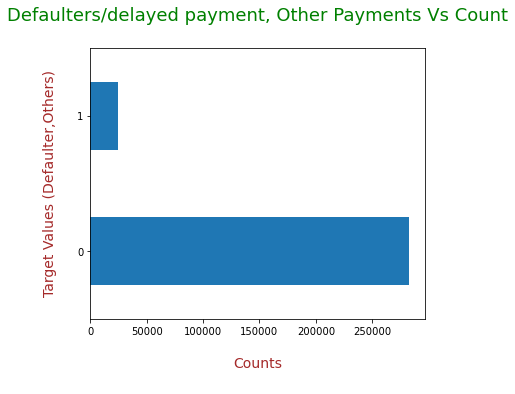

In [126]:
# To analyze 'TARGET' column whether loan defaulters are more or less ('1' = loan defaulter/did late payments, '0'= for all other case )
fig = plt.figure(figsize=(6,5))
EDA_App_list['TARGET'].value_counts().plot.barh()
plt.title("Defaulters/delayed payment, Other Payments Vs Count\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nCounts\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
#plt.xticks(rotation=90)
plt.ylabel("Target Values (Defaulter,Others)\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()

### Inferences

Inferences : As per the above bargraph loan defaulters are very less than all other cases.

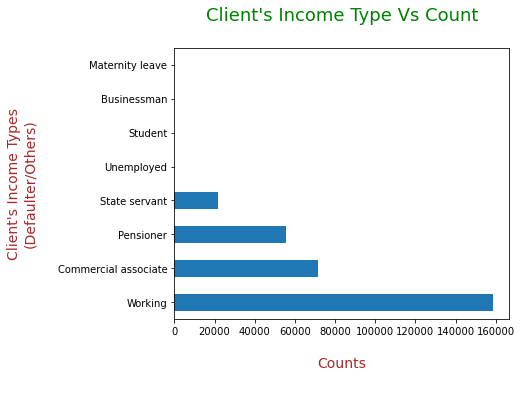

In [123]:
# To show value counts for different Income Types
fig = plt.figure(figsize=(6,5))
EDA_App_list['NAME_INCOME_TYPE'].value_counts().plot.barh()
plt.title("Client's Income Type Vs Count\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nCounts\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.ylabel("Client's Income Types\n(Defaulter/Others)\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()

### Inferences 

Inferences: Above bargraph shows that maximum people's source of income is job/working and others are Commercial Associate, Pensioner, and State Servant whereas very few are Businessman, Students, Unemployed and are on Meternity leave.

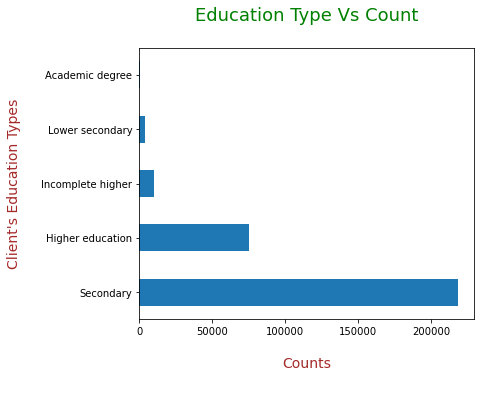

In [124]:
# To show the Types of Education
fig = plt.figure(figsize=(6,5))
EDA_App_list['NAME_EDUCATION_TYPE'].value_counts().plot.barh()
plt.title("Education Type Vs Count\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nCounts\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.ylabel("Client's Education Types\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()

### Inferences:

Inferences: According to the above Bargraph maximum people have done upto Seconday education, whereas very less have done Academic degree.

### Bivariate/Multivariate Analysis

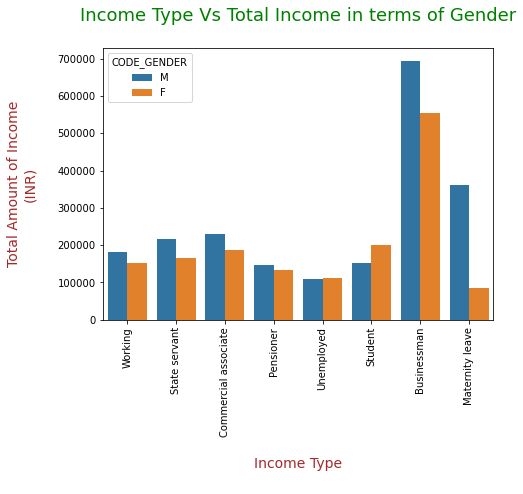

In [80]:
# To analyze various income types in relation with the Gender 
fig = plt.figure(figsize=(7,5))
sns.barplot(data=EDA_App_list, x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', hue='CODE_GENDER', ci=None)
plt.title("Income Type Vs Total Income in terms of Gender\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nIncome Type\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Total Amount of Income\n(INR)\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()

### Inferences:

Inferences: From above bargraph it is clear that among all the categories of Income Type (axcept 'Unemployed and 'Student') 'Male' has higher Total income than 'Female'.


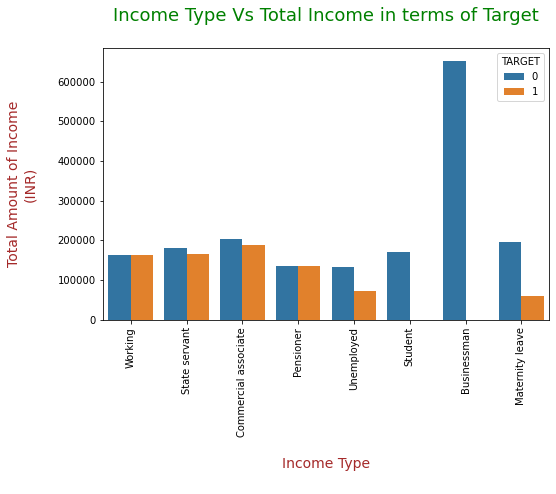

In [81]:
# To analyze Total Income for Various Income Types in terms of Target
fig = plt.figure(figsize=(8,5)) 
sns.barplot(data=EDA_App_list, x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', hue='TARGET', ci=None)
plt.title("Income Type Vs Total Income in terms of Target\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nIncome Type\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Total Amount of Income\n(INR)\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()

#### Inferences

Inferences 1: With the help of above graph it can be seen that there are no people who are businessman and having average income more than INR 600000 are not the loan defaulter / did delayed payment, whereas the people who are Working/Pensioner has equal amount of loan defaulter and other cases.

Inferences 2: It means Businessman are less Defaulters / did delayed payment.

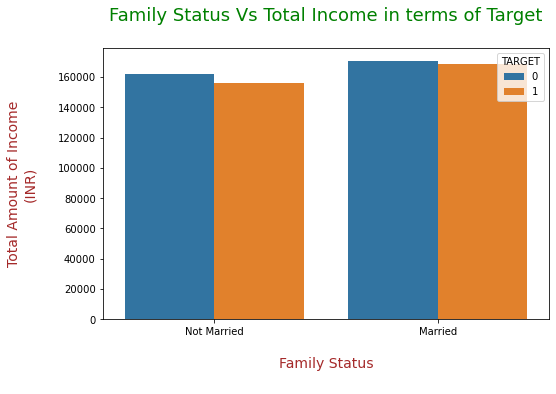

In [82]:
# Bar Chart of 'Married, Not Married' people with respect to Total income and are loan defaulter or not
fig = plt.figure(figsize=(8,5)) # ORGANIZATION_TYPE, estimator=np.max
sns.barplot(data=EDA_App_list, x='NAME_FAMILY_STATUS', y='AMT_INCOME_TOTAL', hue='TARGET', ci=None)
plt.title("Family Status Vs Total Income in terms of Target\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nFamily Status\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.ylabel("Total Amount of Income\n(INR)\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()

### Inferences from the above Bar plot:

Inference 1: The above Bar Graph is showing that 'Married' people who has good income having less marginal difference between loan defaulter and all other cases.

Inference 2: People who are 'Not Married' and having higher income has little less defaulter than Married people.  

Inferences 3: It means 'Not Married' people can be preferred over 'Married' people during loan approvals.

In [83]:
# To Count no. of childerns 
EDA_App_list['CNT_CHILDREN'].value_counts()

0     215368
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

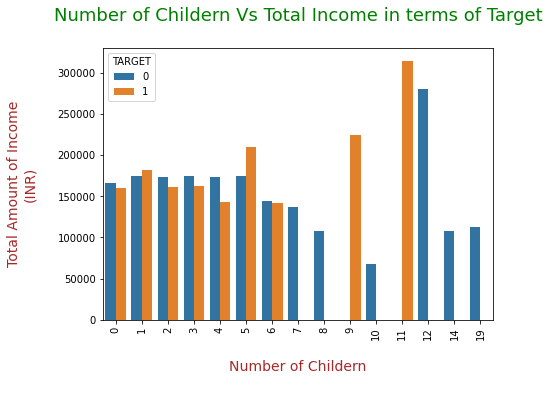

In [84]:
# To analyze number of childern for Various Income Types in terms of Target
fig = plt.figure(figsize=(7,5)) 
sns.barplot(data=EDA_App_list, x='CNT_CHILDREN', y='AMT_INCOME_TOTAL', hue='TARGET', ci=None)
plt.title("Number of Childern Vs Total Income in terms of Target\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nNumber of Childern\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Total Amount of Income\n(INR)\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()

### Inferences from the above Bar plot:
Inference 1: In most of the cases as number of children increases loan defaulters/delayed payment increases.

Inference 2: As Total Income increses number of children increases.

Inferences 3: Therefore, if number of children are more loan defaulters/ delayed payment are more, hence for up to 4 children loan defaulters are less. 

Inferences 4: Bank should avoid giving loan to the people who having more children.  

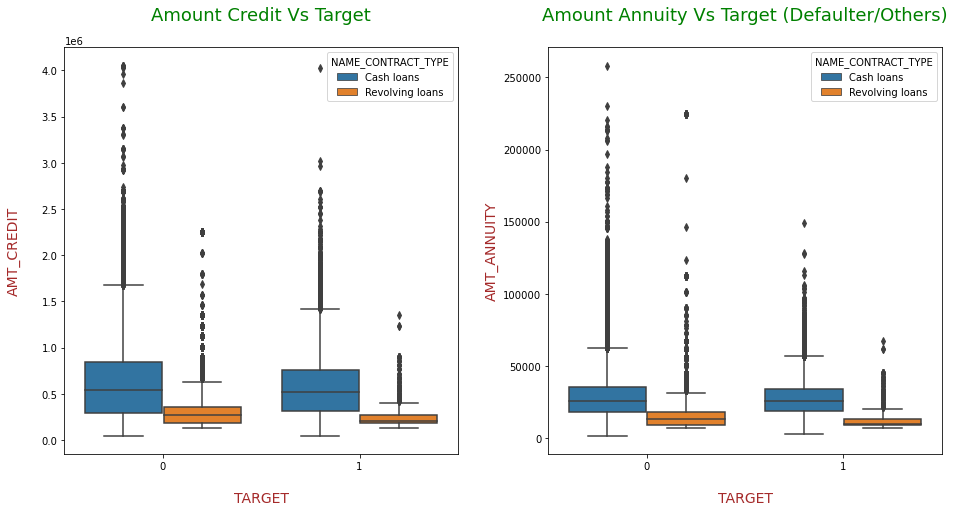

In [85]:
# Box plot - Amount (Credit/Annuity) Vs Target in terms of Contract Type.
%matplotlib inline
fig = plt.figure(figsize=(20, 20))
fig1 = fig.add_subplot(3, 3, 1)    # For adding subplot side by side
sns.boxplot(data=EDA_App_list, x='TARGET', y='AMT_CREDIT', hue="NAME_CONTRACT_TYPE", ax=fig1)
plt.title("Amount Credit Vs Target\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nTARGET\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.ylabel("AMT_CREDIT\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})

fig2 = fig.add_subplot(3, 3, 2)    # For adding subplot side by side
sns.boxplot(data=EDA_App_list, x='TARGET', y='AMT_ANNUITY', hue="NAME_CONTRACT_TYPE", ax=fig2)
plt.title("Amount Annuity Vs Target (Defaulter/Others)\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nTARGET\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.ylabel("\nAMT_ANNUITY",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
fig.tight_layout()
plt.show()

### There are following Inferences from the above Box plots
Inference 1: For the client whether they are loan defaulter/ did delayed payment or for all other cases having higher Amount Annuity for Cash loans than Revolving loans.

Inference 2: Amount Annuity is equally distributed for Cash loans whether it is loan defaulter/ did delayed payment or for all other cases.

Inference 3: For both the Targets Revolving loans maximum is less than the minimum of Cash loans.

Inference 4: For both the cases Credit amount and Amount Annuity is equally divided for Cash loans whereas, Revolving loan's upper half is higher in both the Targets. 

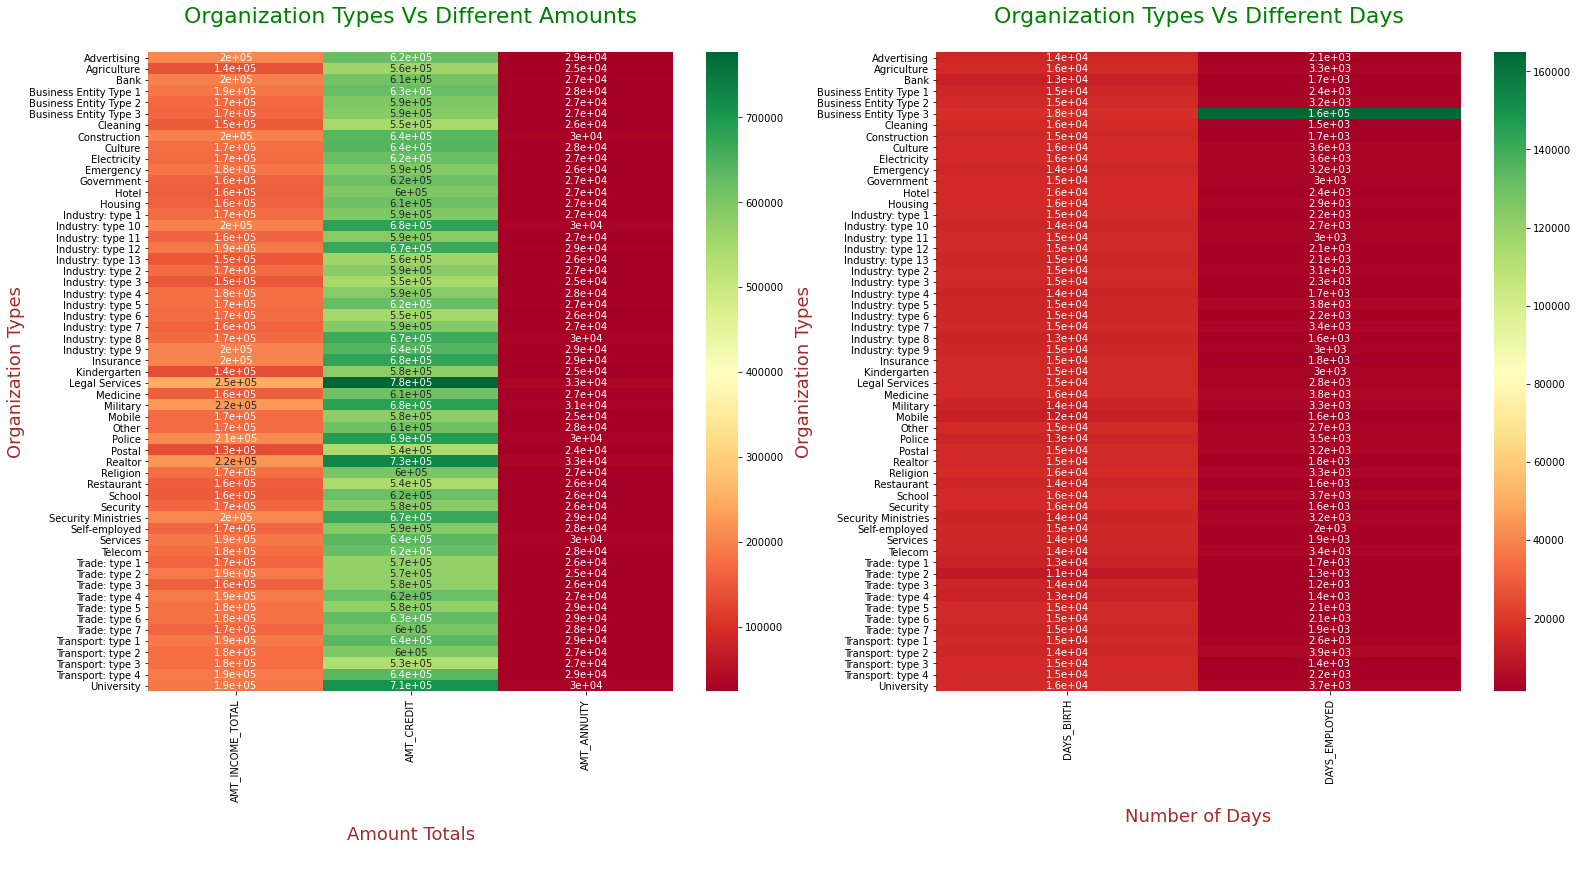

In [86]:
## Amount types Heatmap plot.....
Income_Bucket = EDA_App_list.groupby('ORGANIZATION_TYPE')['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'].mean()
fig = plt.figure(figsize=(40,40))
fig1 = fig.add_subplot(3, 3, 1)    # For adding subplot side by side
sns.heatmap(Income_Bucket, cmap="RdYlGn", annot=True, ax=fig1)
plt.title("Organization Types Vs Different Amounts\n", fontdict={'fontsize':22,'fontweight':5,'color':'Green'})
plt.xlabel("\nAmount Totals\n",fontdict={'fontsize':18,'fontweight':8,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Organization Types",fontdict={'fontsize':18,'fontweight':8,'color':'Brown'})


## Days Types Heatmap plot.....
Income_Bucket = EDA_App_list.groupby('ORGANIZATION_TYPE')['DAYS_BIRTH','DAYS_EMPLOYED'].mean()
fig2 = fig.add_subplot(3, 3, 2)    # For adding subplot side by side
sns.heatmap(Income_Bucket, cmap="RdYlGn", annot=True, ax=fig2)
plt.title("Organization Types Vs Different Days\n", fontdict={'fontsize':22,'fontweight':5,'color':'Green'})
plt.xlabel("\nNumber of Days\n",fontdict={'fontsize':18,'fontweight':8,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("\n\nOrganization Types",fontdict={'fontsize':18,'fontweight':8,'color':'Brown'})
plt.show()

### There are following Inferences from the above Heatmap

Inference 1: Although Maximum Organization Type for the 'legal services' is in medicore range still maximum Credit amount of the loan is for the same Organization Type ('Legal Services') whereas Amount Annuity is less than 100000 for all the Organization Types. 

Inference 2: Maximum number of days employed at the time of loan are for the Organiztion type 'Business Entity Type 3'.


In [117]:
# To find out Correlation among various variables of dataset for Target 0 (All other Cases)
EDA_Targt0_corr = EDA_Targt0.iloc[:,2:]
EDA_Targt0_corr_2 = EDA_Targt0_corr.corr(method='pearson', min_periods=1)

In [118]:
# To find out Correlation among various variables of dataset for Target 1 (loan defaulter/ Delayed Payment)
EDA_Targt1_corr = EDA_Targt1.iloc[:,2:]
EDA_Targt1_corr_2 = EDA_Targt1_corr.corr(method='pearson', min_periods=1)

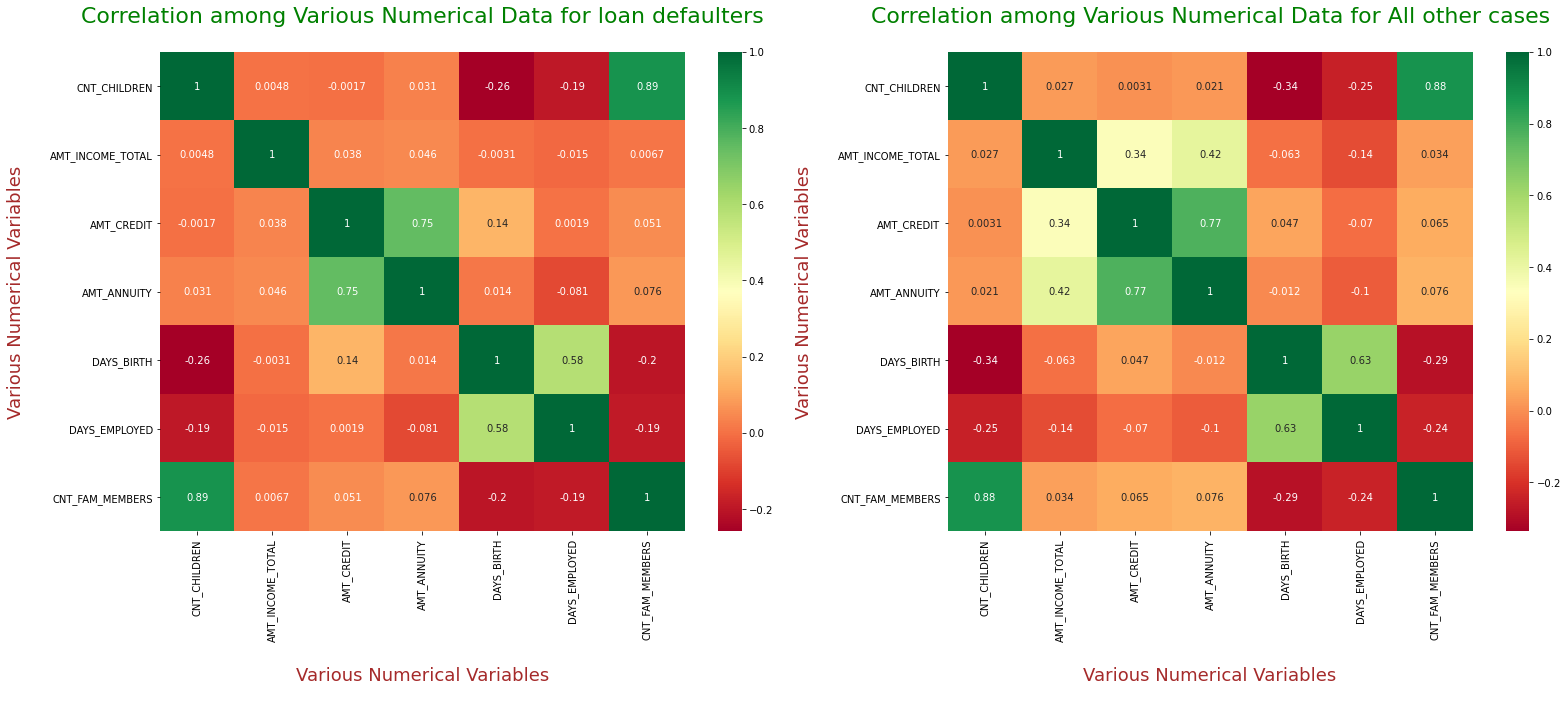

In [119]:
# Heatmap to show coorelation among all the numeric variables for both the cases.
fig = plt.figure(figsize=(40,30))
fig1 = fig.add_subplot(3, 3, 1)    # For adding subplot side by side
sns.heatmap(EDA_Targt1_corr_2, cmap="RdYlGn", annot=True, ax=fig1)
plt.title("Correlation among Various Numerical Data for loan defaulters\n", fontdict={'fontsize':22,'fontweight':5,'color':'Green'})
plt.xlabel("\nVarious Numerical Variables\n",fontdict={'fontsize':18,'fontweight':8,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Various Numerical Variables\n",fontdict={'fontsize':18,'fontweight':8,'color':'Brown'})
#plt.show()

fig2 = fig.add_subplot(3, 3, 2)    # For adding subplot side by side
sns.heatmap(EDA_Targt0_corr_2, cmap="RdYlGn", annot=True, ax=fig2)
plt.title("Correlation among Various Numerical Data for All other cases\n", fontdict={'fontsize':22,'fontweight':5,'color':'Green'})
plt.xlabel("\nVarious Numerical Variables\n",fontdict={'fontsize':18,'fontweight':8,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("\nVarious Numerical Variables\n",fontdict={'fontsize':18,'fontweight':8,'color':'Brown'})
plt.show()


### Inferences:

Target 1: For loan defaulters/ delayed payments

Target 0: For all other cases.

Inferences 1: No. of Children and total family members count are porportionate with each other for both the cases, therefore more no. of Children means more no. of family members and less total income.

Inferences 2: Total income amount and Credit income is inversaly proportional to no. of children, therefore less total income, credit amount for more number of children but this ratio is little better for 'Target 0' instead of 'Target 1'.

Inferences 3: For both the cases 'Amount Annuity' is inversaly proportional to Days Employed, therefore Amount Annuity is less for more no. of days employed. 

Inferences 4: For maximum variable like Total Income, Credit Amount, Amount Annuity value is higher for 'Target0' with respect to 'Target1'. 

### End of the Analysis for the 'Application-Data' set